In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import os
import collections

0         1
0      -6.797270 -5.348965
1      -3.068802  2.007393
2      -5.144518  2.891047
3       1.996201  0.765702
4       2.051769  0.768767
...          ...       ...
903241  1.395295 -6.560986
903242  1.595106 -4.577868
903243  1.437655 -6.586838
903244  0.753023 -2.841733
903245 -4.453433 -4.942733

[903246 rows x 2 columns]

In [36]:
basedir = "/data/franco/zsuzsa_lab/eulogia/umap_data/"
umap_datadict = dict()
for f in os.listdir(basedir):
    print(f)
    arr = f[:-4].strip().split("_")
    neighbors = int(arr[1])
    dist      = float(arr[2])
    df = pd.read_table(basedir+f, sep=" ", header=None)
    key = f"{neighbors}_{dist}"
    umap_datadict[key] = df.values
    

umap_5_0.01.txt
umap_30_0.001.txt
umap_200_0.5.txt
umap_5_0.5.txt
umap_30_0.9.txt
umap_10_0.01.txt
umap_100_0.01.txt
umap_100_0.9.txt
umap_100_0.001.txt
umap_10_0.001.txt
umap_60_0.1.txt
umap_10_0.25.txt
umap_30_0.01.txt
umap_5_0.001.txt
umap_200_0.25.txt
umap_30_0.1.txt
umap_60_0.001.txt
umap_10_0.9.txt
umap_30_0.25.txt
umap_60_0.01.txt
umap_200_0.01.txt
umap_30_0.5.txt
umap_5_0.25.txt
umap_10_0.5.txt
umap_60_0.5.txt
umap_200_0.1.txt
umap_100_0.1.txt
umap_5_0.1.txt
umap_100_0.5.txt
umap_10_0.1.txt
umap_60_0.25.txt
umap_100_0.25.txt
umap_200_0.001.txt
umap_200_0.9.txt
umap_5_0.9.txt
umap_60_0.9.txt


In [37]:
# load seq and annotation data
seqfile = "disprot_plotdata/halft5/seq_data.txt"
annfile = "disprot_plotdata/halft5/annot_data.txt"

with open(seqfile) as instr:
    seq = instr.readlines()[0]
    
with open(annfile) as instr:
    annot = instr.readlines()[0]
    
print(len(seq), len(annot))

903246 903246


In [38]:
SEQ = [aa for aa in seq]
ANNOT = [an for an in annot]
AAs = set(SEQ)

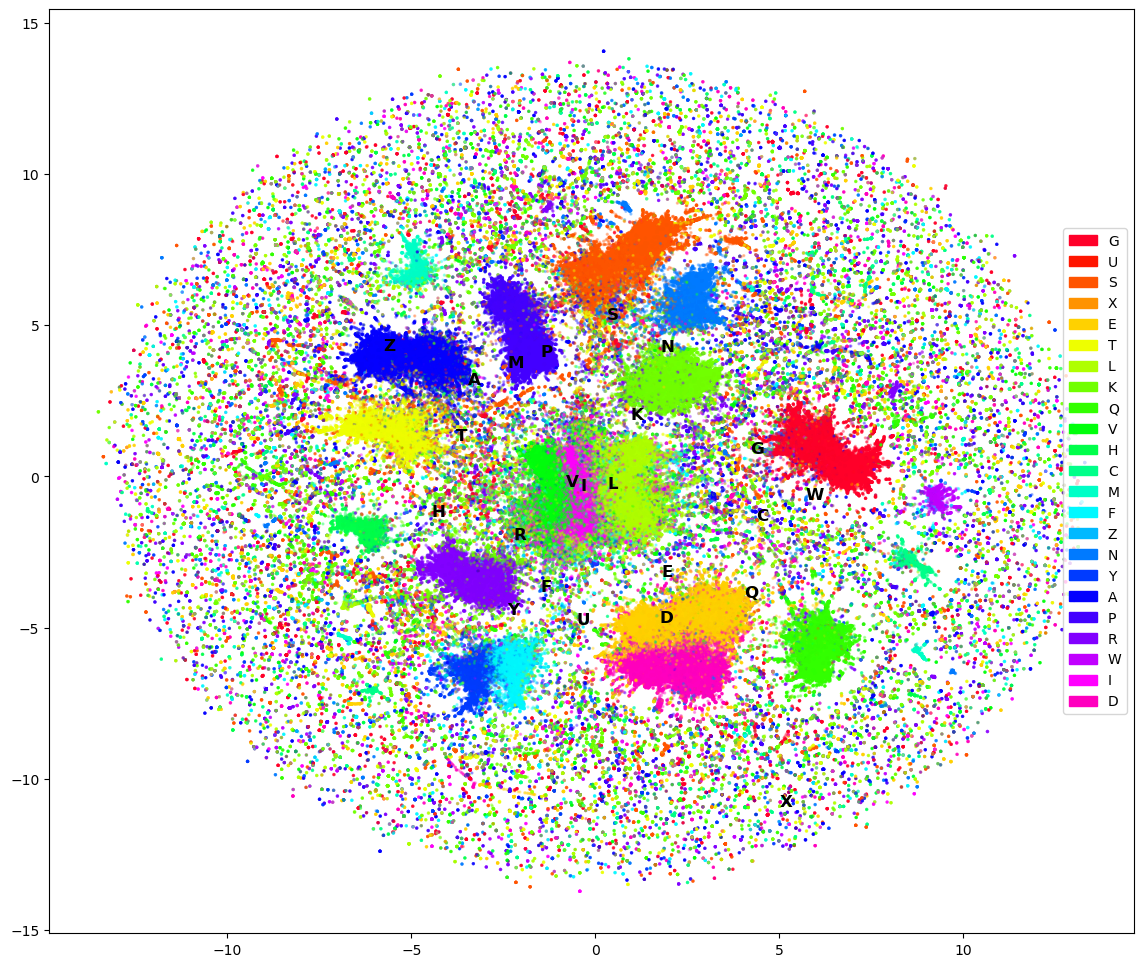

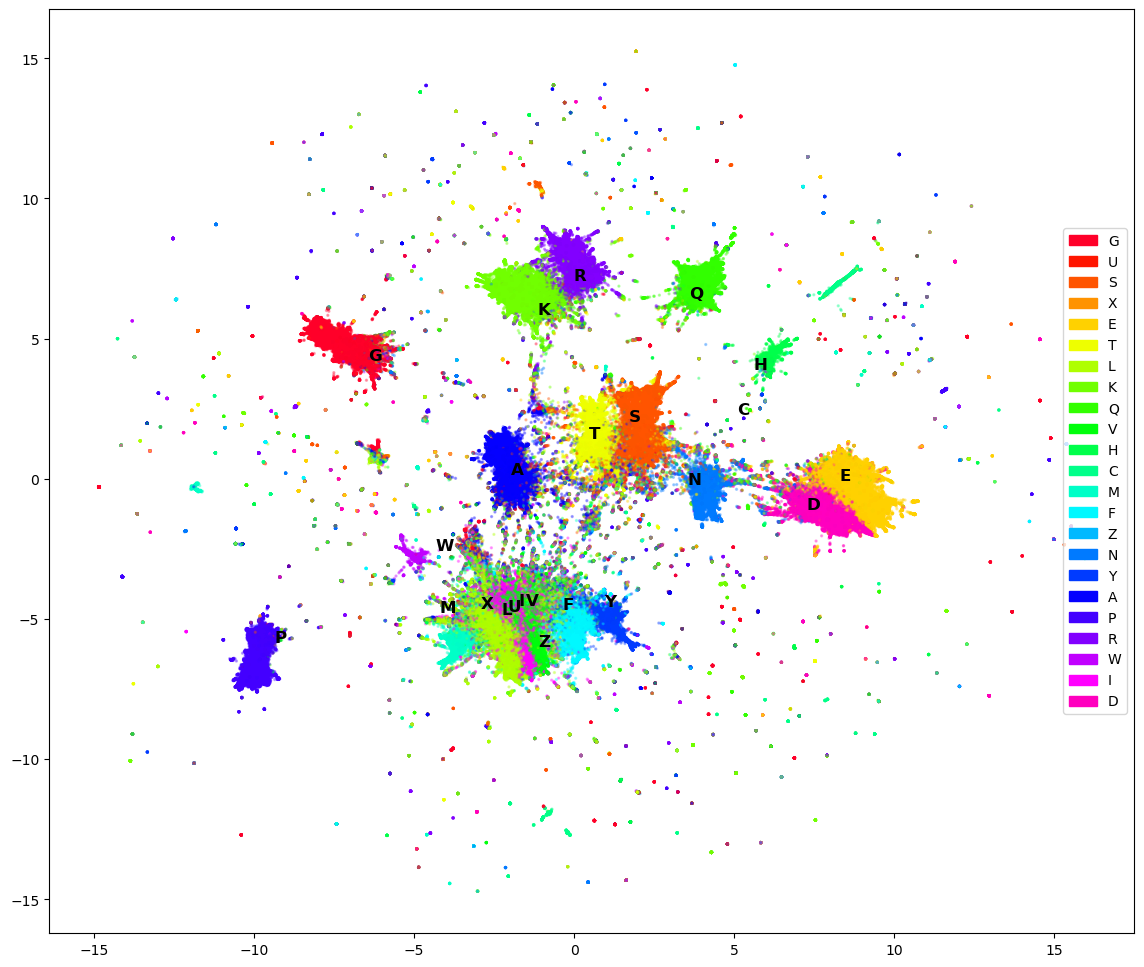

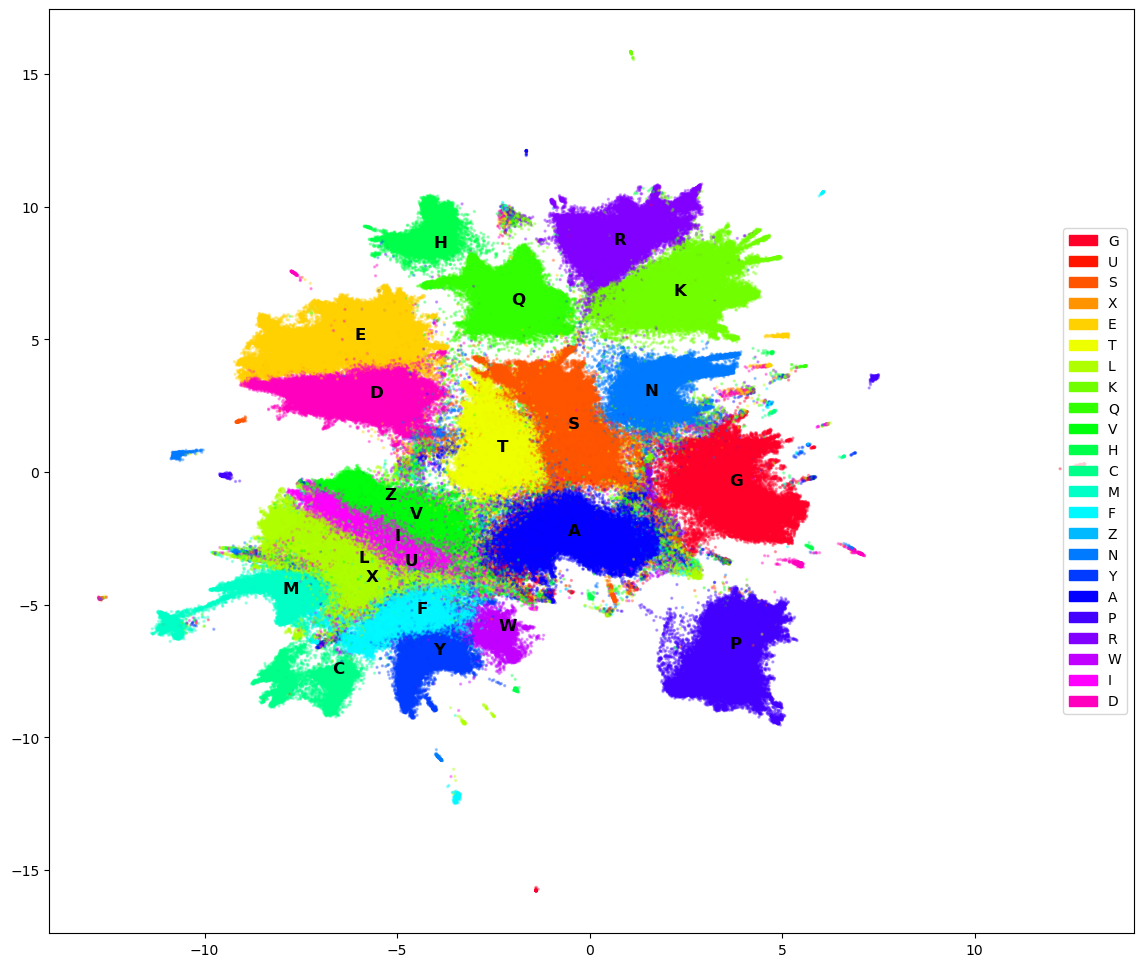

In [39]:
for key in list(umap_datadict.keys())[:3]:
    print(key)
    AAs = list(set(SEQ))
    cmap = cm.get_cmap('gist_rainbow', len(AAs))
    colordict = dict(zip(AAs, np.arange(0, len(AAs))))

    aa_means = dict()
    for aa in AAs:
        AAix = [x for x in range(0, len(SEQ)) if SEQ[x] == aa]
        embed_aa = umap_datadict[key][AAix,:]
        x_mean = np.mean(embed_aa[:,0])
        y_mean = np.mean(embed_aa[:,1])
        aa_means[aa] = (x_mean, y_mean)

    fig = plt.figure(figsize=(14,12))
    ax  = fig.add_subplot(111)
    ax.scatter(umap_datadict[key][:,0], umap_datadict[key][:,1], s=2, alpha=0.3, 
               c=[cmap(colordict[x]) for x in SEQ])

    for aa in aa_means.keys():
        ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

    legend_elements = [Patch(facecolor=cmap(colordict[x]), edgecolor=cmap(colordict[x]),label=x) for x in AAs]
    ax.legend(handles=legend_elements, loc='right')
    plt.show()

['-', 'D', 'F', 'S', 'T']
{'-': 'gray', 'D': 'red', 'F': 'gray', 'S': 'green', 'T': 'red'}


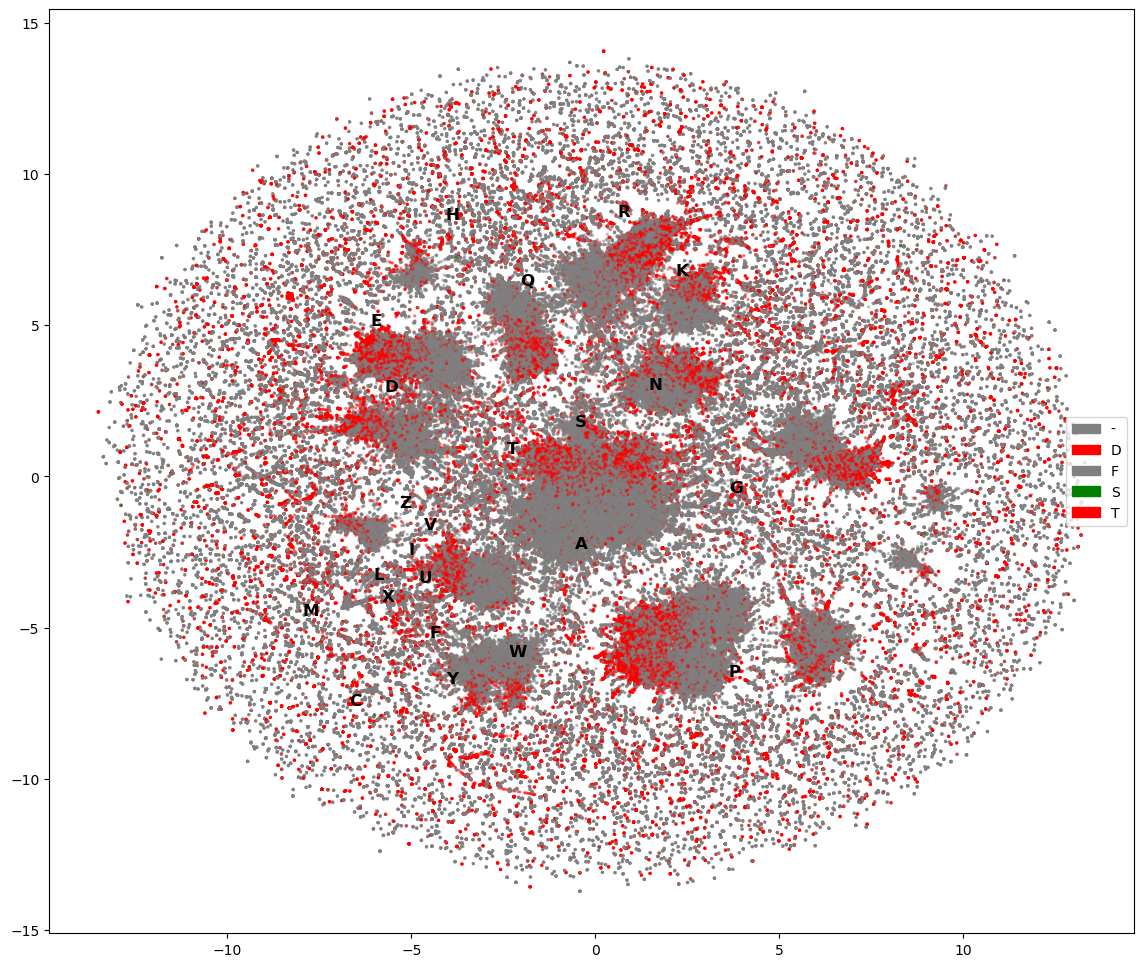

['-', 'D', 'F', 'S', 'T']
{'-': 'gray', 'D': 'red', 'F': 'gray', 'S': 'green', 'T': 'red'}


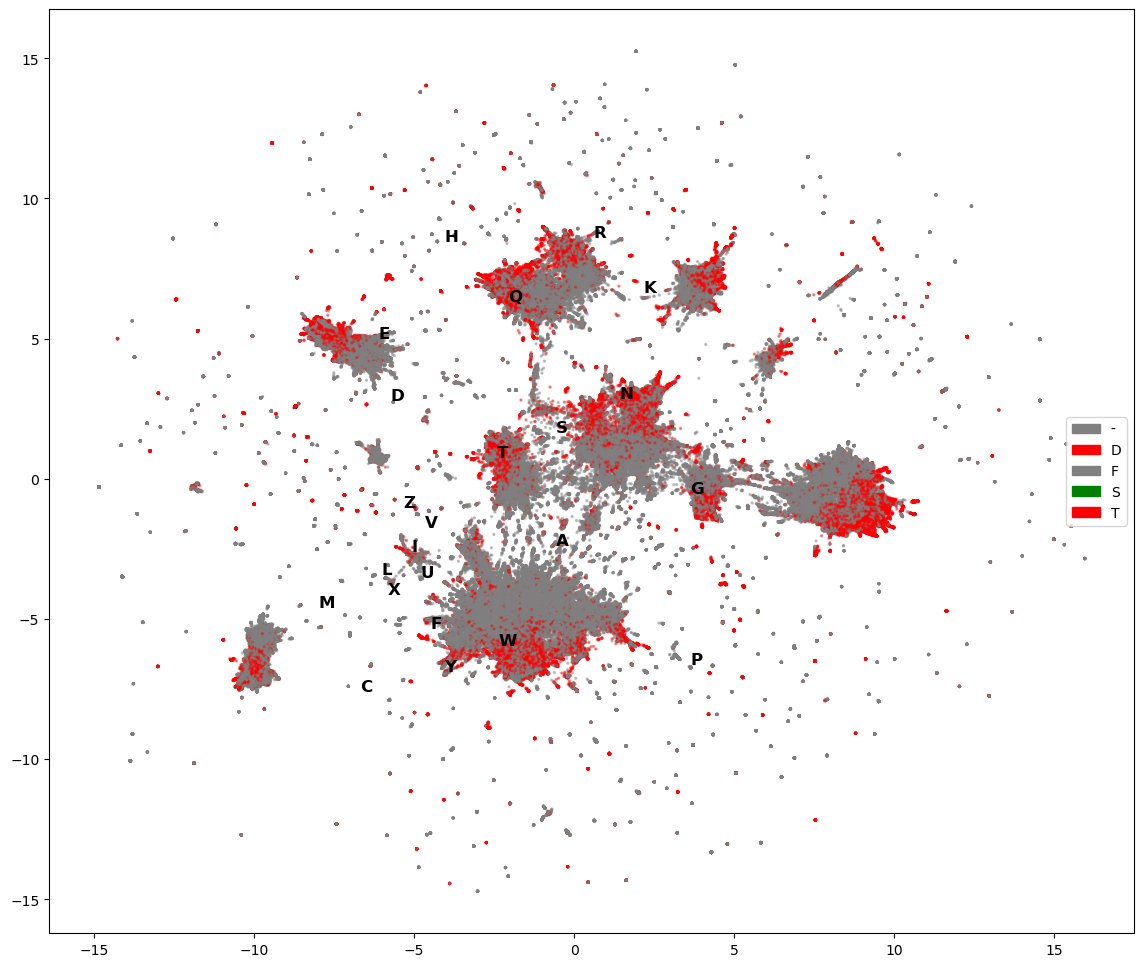

['-', 'D', 'F', 'S', 'T']
{'-': 'gray', 'D': 'red', 'F': 'gray', 'S': 'green', 'T': 'red'}


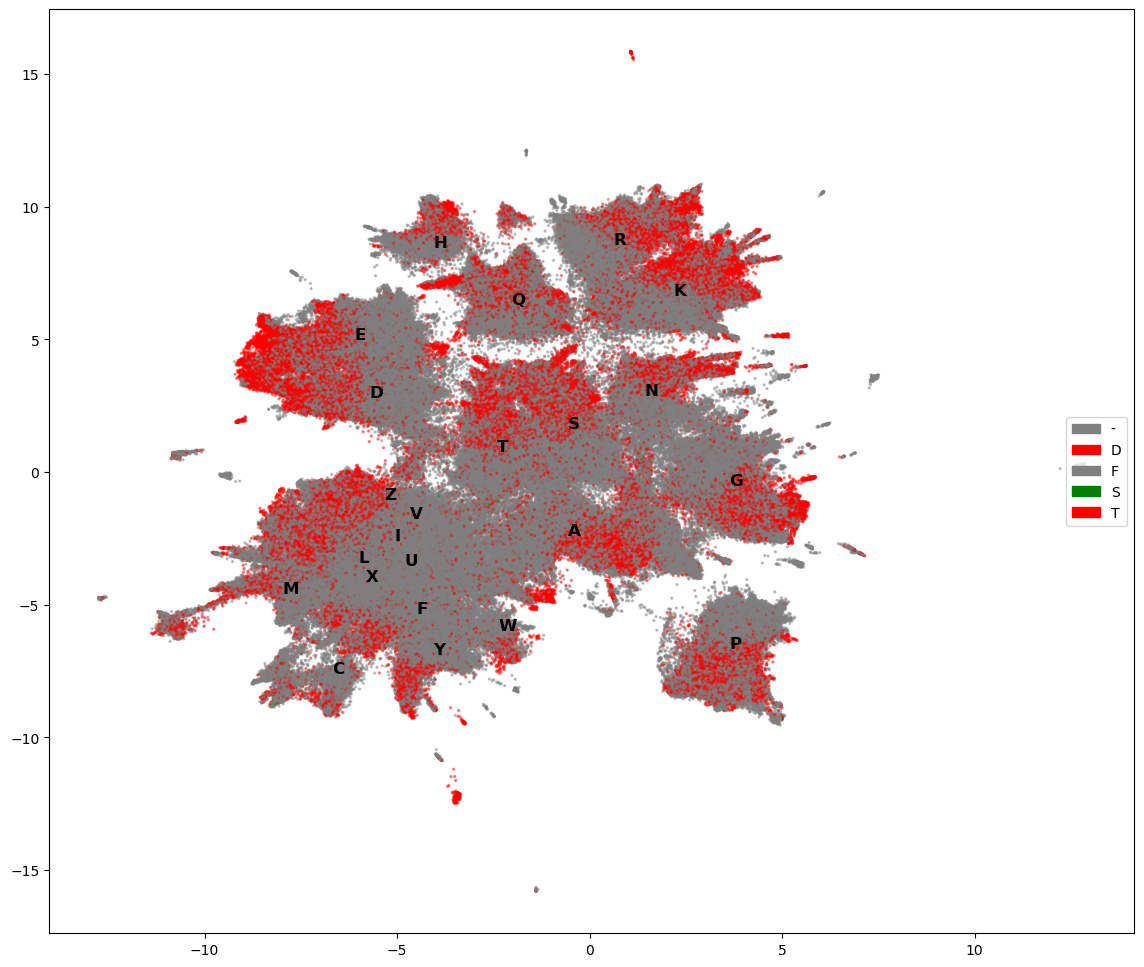

In [40]:
for key in list(umap_datadict.keys())[:3]:

    DDs = sorted(list(set(ANNOT)))
    print(DDs)
    colors = ["gray", "red", "gray", "green", "red"]
    colordict = dict(zip(DDs, colors))
    print(colordict)
    # cmap = cm.get_cmap('Set1', 8)
    # colordict = dict(zip(DDs, np.arange(0, len(DDs))))

    fig = plt.figure(figsize=(14,12))
    ax  = fig.add_subplot(111)
    ax.scatter(umap_datadict[key][:,0], umap_datadict[key][:,1], s=2, alpha=0.4, 
               c=[colordict[x] for x in ANNOT])

    for aa in aa_means.keys():
        ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

    legend_elements = [Patch(facecolor=colordict[x], edgecolor=colordict[x],label=x) for x in DDs]
    ax.legend(handles=legend_elements, loc='right')
    plt.show()